<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#IMPORTS" data-toc-modified-id="IMPORTS-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>IMPORTS</a></span></li><li><span><a href="#INITIAL-DATA-QUALITY-ASSESSMENT-AND-CONFIGURATION" data-toc-modified-id="INITIAL-DATA-QUALITY-ASSESSMENT-AND-CONFIGURATION-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>INITIAL DATA QUALITY ASSESSMENT AND CONFIGURATION</a></span><ul class="toc-item"><li><span><a href="#Drop-Constant-Columns" data-toc-modified-id="Drop-Constant-Columns-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Drop Constant Columns</a></span></li><li><span><a href="#JusfiticationID-looks-to-have-many-NaN-values:-Check-proportion-–-drop-if-predominant" data-toc-modified-id="JusfiticationID-looks-to-have-many-NaN-values:-Check-proportion-–-drop-if-predominant-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>JusfiticationID looks to have many NaN values: Check proportion – drop if predominant</a></span></li><li><span><a href="#Recheck-Number-of-Nulls-in-the-Dataframe" data-toc-modified-id="Recheck-Number-of-Nulls-in-the-Dataframe-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Recheck Number of Nulls in the Dataframe</a></span><ul class="toc-item"><li><span><a href="#Inspect-SUPRESSED-null-values" data-toc-modified-id="Inspect-SUPRESSED-null-values-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>Inspect SUPRESSED null values</a></span></li><li><span><a href="#Drop-SUPRESSED" data-toc-modified-id="Drop-SUPRESSED-2.3.2"><span class="toc-item-num">2.3.2&nbsp;&nbsp;</span>Drop SUPRESSED</a></span></li><li><span><a href="#Inspect-ACTUALTIME_ARR-nulls" data-toc-modified-id="Inspect-ACTUALTIME_ARR-nulls-2.3.3"><span class="toc-item-num">2.3.3&nbsp;&nbsp;</span>Inspect ACTUALTIME_ARR nulls</a></span></li><li><span><a href="#Inspect-ACTUALTIME_DEP-nulls" data-toc-modified-id="Inspect-ACTUALTIME_DEP-nulls-2.3.4"><span class="toc-item-num">2.3.4&nbsp;&nbsp;</span>Inspect ACTUALTIME_DEP nulls</a></span></li></ul></li><li><span><a href="#Drop-NOTE-as-the-meaning-is-not-provided" data-toc-modified-id="Drop-NOTE-as-the-meaning-is-not-provided-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Drop NOTE as the meaning is not provided</a></span></li><li><span><a href="#Check-Remaining-Columns" data-toc-modified-id="Check-Remaining-Columns-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Check Remaining Columns</a></span></li><li><span><a href="#Specify-Datatypes" data-toc-modified-id="Specify-Datatypes-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Specify Datatypes</a></span><ul class="toc-item"><li><span><a href="#To-Datetime:-DAYOFSERVICE-and-LASTUPDATE" data-toc-modified-id="To-Datetime:-DAYOFSERVICE-and-LASTUPDATE-2.6.1"><span class="toc-item-num">2.6.1&nbsp;&nbsp;</span>To Datetime: DAYOFSERVICE and LASTUPDATE</a></span></li><li><span><a href="#Other-Conversions" data-toc-modified-id="Other-Conversions-2.6.2"><span class="toc-item-num">2.6.2&nbsp;&nbsp;</span>Other Conversions</a></span></li></ul></li><li><span><a href="#Assess" data-toc-modified-id="Assess-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>Assess</a></span></li></ul></li><li><span><a href="#READ-FEATHER-/-Continue-Data-Quality-&amp;-Data-Insight-Gathering" data-toc-modified-id="READ-FEATHER-/-Continue-Data-Quality-&amp;-Data-Insight-Gathering-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>READ FEATHER / Continue Data Quality &amp; Data Insight Gathering</a></span><ul class="toc-item"><li><span><a href="#Continue-Data-Quality-Checks" data-toc-modified-id="Continue-Data-Quality-Checks-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Continue Data Quality Checks</a></span><ul class="toc-item"><li><span><a href="#Inspect-Dataframe-Null-Values" data-toc-modified-id="Inspect-Dataframe-Null-Values-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Inspect Dataframe Null Values</a></span></li><li><span><a href="#Inspect-most-and-least-frequently-appearing-values-for-each-feature" data-toc-modified-id="Inspect-most-and-least-frequently-appearing-values-for-each-feature-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>Inspect most and least frequently appearing values for each feature</a></span></li><li><span><a href="#Examine-trip_id-Closer" data-toc-modified-id="Examine-trip_id-Closer-3.1.3"><span class="toc-item-num">3.1.3&nbsp;&nbsp;</span>Examine trip_id Closer</a></span></li><li><span><a href="#Examine-Interesting-Cardinality-Characteristics" data-toc-modified-id="Examine-Interesting-Cardinality-Characteristics-3.1.4"><span class="toc-item-num">3.1.4&nbsp;&nbsp;</span>Examine Interesting Cardinality Characteristics</a></span></li><li><span><a href="#Plot-the-Continuous-Features" data-toc-modified-id="Plot-the-Continuous-Features-3.1.5"><span class="toc-item-num">3.1.5&nbsp;&nbsp;</span>Plot the Continuous Features</a></span></li></ul></li></ul></li></ul></div>

# IMPORTS

In [1]:
from IPython.core.display import display, HTML
display(HTML('<style>.container {width:100% !important;}</style>'))

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

In [3]:
# Display plots in the notebook
%matplotlib inline

In [4]:
def assess_df(df):
  
    # declare the feature types in the dataframe.
    # this adds dynamism to the function, whereby it can check
    # for constant columns on a dtype-amended or non-amended
    # dataframe.
    # Applicable for constant column check below

    feature_types = {df[df.columns[x]].dtypes.name for x in range(len(df.columns))}
    
  	# print datatypes
  
    print("Datatypes:\n")
    print(df.dtypes)
    print('\n\n')
    
    # print number rows and cols
    print('*' * 50)
    print('ROWS, COLUMNS, NULLS\n')
    print(df.shape[0], "rows in the dataframe.")
    print(df.shape[1], "columns in the dataframe.\n")
    print(df.isnull().sum().sum(), "null values in the dataframe.")
    
    # check duplicate rows & col; print if present
    
    duplicate_rows = df.duplicated(keep=False).sum()
    duplicate_cols = df.index.T.duplicated(keep=False).sum()
    
    print(duplicate_rows, "duplicate rows")
    print(duplicate_cols, "duplicate columns")
    
    if duplicate_rows > 0 or duplicate_cols > 0:
      print(df.loc[df.duplicated()])
	
    print('\n')
    
    
    # check for constant columns
    # form lists of numeric and categorical columns
    
    numeric_cols = list(df.select_dtypes(include=[np.number]).columns.values)
    categorical_cols = list(df.select_dtypes('category').columns.values)
    
    # generate list of standard deviations for each numeric feature
    # a standard deviation of 0 indicates a constant numeric column.
    
    standard_diffs = [df.describe().loc['std', x] for x in numeric_cols]
    
    
    # for each categorical column, check whether the feature has
    # a unique value of 1. if yes, indicates a constant column
    
    constant_categorical_column=False
    if 'category' in feature_types:
        for column in categorical_cols:
            if df[column].describe().index.unique == 1:
                constant_categorical_column = True
    
    # print the results of checking for constant columns
    # for both continuous and categorical features
            
    if 0 in standard_diffs:
        print("Constant numeric columns: TRUE")
    else:
        print("Constant numeric columns: FALSE")
  
    if 'category' in feature_types:    
        if constant_categorical_column == True:
            print("Constant categorical columns: TRUE")
        else:
            print("Constant categorical columns: FALSE")

            
    
    print('\n\n')

    
    # feature stats
    print('*' * 50)
    print('DESCRIPTION\n')
    print(df.describe().T)
    print('\n\n')
    print('*' * 50)

    
    # feature stats: categorical
    
    if 'category' in feature_types:
        print('CATEGORICAL DESCRIPTION\n')
        print('\n')
        print(df.select_dtypes(['category']).describe().T)
        print('\n\n')
        print('*' * 50)
    
    # print feature cardinalities
    
    print("FEATURE CARDINALITIES\n")
    column_names = list(df.columns.values)

    print('{0:45}  {1}'.format("Feature", "Distinct Values"))
    print('{0:45}  {1}'.format("-------", "--------------- \n"))

    for c in column_names:
        print('{0:45}  {1}'.format(c, str(len(df[c].unique()))))
    
    print('\n')
    print('*' * 50)
    print('MEMORY\n')
    
    
    print(df.info(memory_usage='deep'))
    print('\n')
    print(df.memory_usage(deep=True))
    print('\n')
    print('*' * 50)
    print('HEAD\n')
    print(df.head(10))
    print('\n')
    print('*' * 50)
    print('TAIL\n')
    print(df.tail(10))

# INITIAL DATA QUALITY ASSESSMENT AND CONFIGURATION

In [5]:
path = \
'/home/student/data/original_raw_data_bus_total/rt_trips_DB_2018.txt'
trips = pd.read_csv(path, sep=';')

In [6]:
trips.head()

,DATASOURCE,DAYOFSERVICE,TRIPID,LINEID,ROUTEID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,BASIN,TENDERLOT,SUPPRESSED,JUSTIFICATIONID,LASTUPDATE,NOTE
0,DB,07-FEB-18 00:00:00,6253783,68,68_80,1,87245,84600,87524.0,84600.0,BasDef,NaN,NaN,NaN,28-FEB-18 12:05:11,",2967409,"
1,DB,07-FEB-18 00:00:00,6262138,25B,25B_271,2,30517,26460,32752.0,NaN,BasDef,NaN,NaN,NaN,28-FEB-18 12:05:11,",2580260,"
2,DB,07-FEB-18 00:00:00,6254942,45A,45A_70,2,35512,32100,36329.0,32082.0,BasDef,NaN,NaN,NaN,28-FEB-18 12:05:11,",2448968,"
3,DB,07-FEB-18 00:00:00,6259460,25A,25A_273,1,57261,54420,58463.0,54443.0,BasDef,NaN,NaN,NaN,28-FEB-18 12:05:11,",3094242,"
4,DB,07-FEB-18 00:00:00,6253175,14,14_15,1,85383,81600,84682.0,81608.0,BasDef,NaN,NaN,NaN,28-FEB-18 12:05:11,",2526331,"


In [7]:
assess_df(trips)

Datatypes:

DATASOURCE          object
DAYOFSERVICE        object
TRIPID               int64
LINEID              object
ROUTEID             object
DIRECTION            int64
PLANNEDTIME_ARR      int64
PLANNEDTIME_DEP      int64
ACTUALTIME_ARR     float64
ACTUALTIME_DEP     float64
BASIN               object
TENDERLOT          float64
SUPPRESSED         float64
JUSTIFICATIONID    float64
LASTUPDATE          object
NOTE                object
dtype: object



**************************************************
ROWS, COLUMNS, NULLS

2182637 rows in the dataframe.
16 columns in the dataframe.

6841006 null values in the dataframe.
0 duplicate rows
0 duplicate columns


Constant numeric columns: TRUE



**************************************************
DESCRIPTION

                     count          mean            std        min        25%  \
TRIPID           2182637.0  7.149479e+06  731442.265466  5955221.0  6592584.0   
DIRECTION        2182637.0  1.504103e+00       0.499983        1.0  

## Drop Constant Columns

In [8]:
trips.drop([
    'DATASOURCE',
    'BASIN',
    'TENDERLOT'
], axis = 1, inplace=True)

## JusfiticationID looks to have many NaN values: Check proportion – drop if predominant

In [9]:
trips.JUSTIFICATIONID.value_counts(dropna=False).head()

NaN         2178307
203708.0         19
203707.0         15
203715.0         14
204297.0         14
Name: JUSTIFICATIONID, dtype: int64

In [10]:
# The vast majority of values are NaN.
# We drop the feature

trips.drop('JUSTIFICATIONID', axis=1, inplace=True)

## Recheck Number of Nulls in the Dataframe

In [12]:
print(trips.isnull().sum())

DAYOFSERVICE             0
TRIPID                   0
LINEID                   0
ROUTEID                  0
DIRECTION                0
PLANNEDTIME_ARR          0
PLANNEDTIME_DEP          0
ACTUALTIME_ARR      137207
ACTUALTIME_DEP      164551
SUPPRESSED         2178304
LASTUPDATE               0
NOTE                     0
dtype: int64


### Inspect SUPRESSED null values

In [13]:
print(round(trips.SUPPRESSED.isnull().sum() / len(trips),3), "% of SUPRESSED values are null")

0.998 % of SUPRESSED values are null


### Drop SUPRESSED

In [14]:
trips.drop('SUPPRESSED', axis=1, inplace=True)

### Inspect ACTUALTIME_ARR nulls

In [15]:
print(round(trips.ACTUALTIME_ARR.isnull().sum() / len(trips),3), "% of ActualTime_Arr values are Null")

0.063 % of ActualTime_Arr values are Null


### Inspect ACTUALTIME_DEP nulls

In [16]:
print(round(trips.ACTUALTIME_DEP.isnull().sum() / len(trips),3), "% of ACTUALTIME_DEP values are Null")

0.075 % of ACTUALTIME_DEP values are Null


These rows can be dropped at a later time.

## Drop NOTE as the meaning is not provided

In [17]:
trips.drop('NOTE', axis=1, inplace=True)

## Check Remaining Columns

In [21]:
for col in trips.columns:
    print(col)
print("\n", len(trips.columns), "columns")

DAYOFSERVICE
TRIPID
LINEID
ROUTEID
DIRECTION
PLANNEDTIME_ARR
PLANNEDTIME_DEP
ACTUALTIME_ARR
ACTUALTIME_DEP
LASTUPDATE

 10 columns


## Specify Datatypes

### To Datetime: DAYOFSERVICE and LASTUPDATE

In [22]:
trips.loc[:, 'DAYOFSERVICE'] = trips.loc[:, 'DAYOFSERVICE'].\
apply(lambda x: pd.to_datetime(x, format='%d-%b-%y %H:%M:%S'))

trips.loc[:, 'LASTUPDATE'] = trips.loc[:, 'LASTUPDATE'].\
apply(lambda x: pd.to_datetime(x, format='%d-%b-%y %H:%M:%S'))

### Other Conversions

In [25]:
trips.ACTUALTIME_ARR.max()

94378.0

In [26]:
trips.ACTUALTIME_DEP.max()

97177.0

In [27]:
trips = trips.astype({
    'TRIPID':'category',
    'LINEID':'category',
    'ROUTEID':'category',
    'DIRECTION':'category',
    'PLANNEDTIME_ARR':'int32',
    'PLANNEDTIME_DEP':'int32',
    'ACTUALTIME_ARR':'float32',
    'ACTUALTIME_DEP':'float32'
})

## Assess

In [28]:
assess_df(trips)

Datatypes:

DAYOFSERVICE       datetime64[ns]
TRIPID                   category
LINEID                   category
ROUTEID                  category
DIRECTION                category
PLANNEDTIME_ARR             int32
PLANNEDTIME_DEP             int32
ACTUALTIME_ARR            float32
ACTUALTIME_DEP            float32
LASTUPDATE         datetime64[ns]
dtype: object



**************************************************
ROWS, COLUMNS, NULLS

2182637 rows in the dataframe.
10 columns in the dataframe.

301758 null values in the dataframe.
0 duplicate rows
0 duplicate columns


Constant numeric columns: FALSE
Constant categorical columns: FALSE



**************************************************
DESCRIPTION

                     count          mean           std      min      25%  \
PLANNEDTIME_ARR  2182637.0  55078.747653  17424.822304  18203.0  39683.0   
PLANNEDTIME_DEP  2182637.0  51533.292820  17571.637274  16200.0  36000.0   
ACTUALTIME_ARR   2045430.0  55062.398438  17338.699219  17

In [30]:
trips.to_feather('/home/student/analytics/dataframe_saves/rt_trips/020819_postassessquality_withNaNs_withLASTUPDATE.feather')

# READ FEATHER / Continue Data Quality & Data Insight Gathering

In [71]:
df = pd.read_feather('/tmp/ssh_mount/rt_trips/020719_postassessquality_wNaNs_trips.feather')

In [72]:
df.head()

,DAYOFSERVICE,TRIPID,LINEID,ROUTEID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,LASTUPDATE
0,2018-02-07,6253783,68,68_80,1,87245,84600,87524.0,84600.0,2018-02-28 12:05:11
1,2018-02-07,6262138,25B,25B_271,2,30517,26460,32752.0,NaN,2018-02-28 12:05:11
2,2018-02-07,6254942,45A,45A_70,2,35512,32100,36329.0,32082.0,2018-02-28 12:05:11
3,2018-02-07,6259460,25A,25A_273,1,57261,54420,58463.0,54443.0,2018-02-28 12:05:11
4,2018-02-07,6253175,14,14_15,1,85383,81600,84682.0,81608.0,2018-02-28 12:05:11


In [73]:
df.drop('LASTUPDATE', axis=1, inplace=True)

In [74]:
df.head()

,DAYOFSERVICE,TRIPID,LINEID,ROUTEID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP
0,2018-02-07,6253783,68,68_80,1,87245,84600,87524.0,84600.0
1,2018-02-07,6262138,25B,25B_271,2,30517,26460,32752.0,NaN
2,2018-02-07,6254942,45A,45A_70,2,35512,32100,36329.0,32082.0
3,2018-02-07,6259460,25A,25A_273,1,57261,54420,58463.0,54443.0
4,2018-02-07,6253175,14,14_15,1,85383,81600,84682.0,81608.0


## Continue Data Quality Checks

In [75]:
assess_df(df)

Datatypes:

DAYOFSERVICE       datetime64[ns]
TRIPID                   category
LINEID                   category
ROUTEID                  category
DIRECTION                category
PLANNEDTIME_ARR             int32
PLANNEDTIME_DEP             int32
ACTUALTIME_ARR            float32
ACTUALTIME_DEP            float32
dtype: object



**************************************************
ROWS, COLUMNS, NULLS

2182637 rows in the dataframe.
9 columns in the dataframe.

301758 null values in the dataframe.
0 duplicate rows
0 duplicate columns


Constant numeric columns: FALSE
Constant categorical columns: FALSE



**************************************************
DESCRIPTION

                     count          mean           std      min      25%  \
PLANNEDTIME_ARR  2182637.0  55078.747653  17424.822304  18203.0  39683.0   
PLANNEDTIME_DEP  2182637.0  51533.292820  17571.637274  16200.0  36000.0   
ACTUALTIME_ARR   2045430.0  55036.992188  17329.863281  17546.0  39668.0   
ACTUALTIME_DEP   

### Inspect Dataframe Null Values

In [76]:
features = df.columns 

In [77]:
# check the number of nulls for each feature
# and check what percentage these represent
# of the total values for that feature

for feature in features:
    number_nulls = df.loc[:, feature].isnull().sum()
    print(feature, "---", number_nulls, "nulls –––", round(number_nulls / len(df) * 100, 3), "% rows affected")

DAYOFSERVICE --- 0 nulls ––– 0.0 % rows affected
TRIPID --- 0 nulls ––– 0.0 % rows affected
LINEID --- 0 nulls ––– 0.0 % rows affected
ROUTEID --- 0 nulls ––– 0.0 % rows affected
DIRECTION --- 0 nulls ––– 0.0 % rows affected
PLANNEDTIME_ARR --- 0 nulls ––– 0.0 % rows affected
PLANNEDTIME_DEP --- 0 nulls ––– 0.0 % rows affected
ACTUALTIME_ARR --- 137207 nulls ––– 6.286 % rows affected
ACTUALTIME_DEP --- 164551 nulls ––– 7.539 % rows affected


In [13]:
# check whether the nulls in these columns
# account for all the dataframe's nulls.

df.ACTUALTIME_ARR.isnull().sum() + df.ACTUALTIME_DEP.isnull().sum()\
== df.isnull().sum().sum()

True

### Inspect most and least frequently appearing values for each feature

In [14]:
# print top values for each feature

for feature in features:
    print(feature)
    print(df[feature].dtype, "\n")
    print(df[feature].value_counts().nlargest(10),"\n\n")

DAYOFSERVICE
datetime64[ns] 

2018-02-12    7122
2018-02-19    7121
2018-04-17    7118
2018-02-20    7111
2018-01-30    7099
2018-02-02    7098
2018-03-20    7098
2018-02-06    7097
2018-04-09    7094
2018-04-10    7093
Name: DAYOFSERVICE, dtype: int64 


TRIPID
category 

7324685    19
7323295    19
7316504    19
7316505    19
7323419    19
7323417    19
7323411    19
7323410    19
7323407    19
7323406    19
Name: TRIPID, dtype: int64 


LINEID
category 

46A    76728
145    62730
15     58083
40     56974
39A    55301
130    54301
27     51023
123    48917
16     48628
9      43613
Name: LINEID, dtype: int64 


ROUTEID
category 

46A_74     37182
46A_67     35759
145_102    29259
15_17      28471
145_105    27964
40_31      27809
39A_43     27669
130_11     27516
40_27      27106
130_10     26785
Name: ROUTEID, dtype: int64 


DIRECTION
category 

2    1100273
1    1082364
Name: DIRECTION, dtype: int64 


PLANNEDTIME_ARR
int32 

31620    467
26400    425
65880    402
59700    400
32

In [15]:
# print bottom value for each feature

for feature in features:
    print(feature)
    print(df[feature].dtype, "\n")
    print(df[feature].value_counts().nsmallest(10),"\n\n")

DAYOFSERVICE
datetime64[ns] 

2018-03-03    1901
2018-10-28    3478
2018-03-04    3520
2018-12-26    3543
2018-10-14    3550
2018-08-26    3554
2018-12-30    3557
2018-12-02    3559
2018-10-07    3570
2018-12-23    3571
Name: DAYOFSERVICE, dtype: int64 


TRIPID
category 

6099439    1
6100002    1
6099440    1
6278970    1
6588242    1
6100003    1
6278737    1
6278736    1
6100004    1
6099671    1
Name: TRIPID, dtype: int64 


LINEID
category 

33E     14
41D     36
16D     84
51X    238
77X    243
68X    243
118    343
31D    357
70D    360
42D    360
Name: LINEID, dtype: int64 


ROUTEID
category 

33D_76      2
14C_10      4
41X_131     4
41B_58      5
140_16      5
41X_119     7
41_25       7
41_24       9
33B_60      9
83_29      10
Name: ROUTEID, dtype: int64 


DIRECTION
category 

1    1082364
2    1100273
Name: DIRECTION, dtype: int64 


PLANNEDTIME_ARR
int32 

24481    1
80899    1
33136    1
80951    1
29034    1
77923    1
83231    1
84451    1
56622    1
23569    1
Name

Results:
    
- There are between 1 and 19 entries for a given trip_id. What is the meaning of trip_id?
- Some line_id and route_id values are extrememly infrequent (e.g. 33E has 14 occurrences, whereas 46a has 76728 occurrences)

### Examine trip_id Closer

Firstly look at multiple occurrences of trip_id in the table

In [16]:
# look at a rows where trip id occurs more than once

df.loc[df.TRIPID == 7324685, :].sort_values(by='DAYOFSERVICE')

,DAYOFSERVICE,TRIPID,LINEID,ROUTEID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP
182940,2018-07-30,7324685,140,140_21,2,58348,54900,58887.0,54939.0
958963,2018-07-31,7324685,140,140_21,2,58348,54900,58919.0,54878.0
1326273,2018-08-01,7324685,140,140_21,2,58348,54900,59202.0,54901.0
1281918,2018-08-02,7324685,140,140_21,2,58348,54900,NaN,54951.0
402400,2018-08-03,7324685,140,140_21,2,58348,54900,58783.0,54889.0
730632,2018-08-07,7324685,140,140_21,2,58348,54900,58986.0,54909.0
1225649,2018-08-08,7324685,140,140_21,2,58348,54900,60123.0,54910.0
274923,2018-08-09,7324685,140,140_21,2,58348,54900,59343.0,54890.0
1981294,2018-08-10,7324685,140,140_21,2,58348,54900,59411.0,NaN
2060750,2018-08-13,7324685,140,140_21,2,58348,54900,NaN,54917.0


In [17]:
# look at another set of rows where trip id occurs more than once

df.loc[df.TRIPID == 7323295, :].sort_values(by='DAYOFSERVICE')

,DAYOFSERVICE,TRIPID,LINEID,ROUTEID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP
180648,2018-07-30,7323295,18,18_4,2,27271,24300,27319.0,24300.0
957501,2018-07-31,7323295,18,18_4,2,27271,24300,27342.0,NaN
1323662,2018-08-01,7323295,18,18_4,2,27271,24300,27336.0,24303.0
1280465,2018-08-02,7323295,18,18_4,2,27271,24300,27406.0,24398.0
403436,2018-08-03,7323295,18,18_4,2,27271,24300,27598.0,24329.0
729197,2018-08-07,7323295,18,18_4,2,27271,24300,27356.0,NaN
1223020,2018-08-08,7323295,18,18_4,2,27271,24300,27150.0,24312.0
263350,2018-08-09,7323295,18,18_4,2,27271,24300,27387.0,24312.0
601790,2018-08-10,7323295,18,18_4,2,27271,24300,27107.0,24298.0
582558,2018-08-13,7323295,18,18_4,2,27271,24300,27433.0,24448.0


Result: There are 360 days of service in the dataset. Here, in each case, a particular trip_id is represented 19 times, on temporally close dates.

In [18]:
# find a trip_id represented in the middle cardinality range: 9

pd.DataFrame(df.loc[df.TRIPID.value_counts().values == 9, :].iloc[0,:]).T

,DAYOFSERVICE,TRIPID,LINEID,ROUTEID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP
45568,2018-10-16 00:00:00,8026357,26,26_29,2,50014,48300,NaN,48257


In [19]:
# show the instances of this trip_id

df.loc[df.TRIPID == 8026357, :].sort_values(by='DAYOFSERVICE')

,DAYOFSERVICE,TRIPID,LINEID,ROUTEID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP
1184813,2018-10-08,8026357,26,26_29,2,50014,48300,50335.0,48272.0
1196990,2018-10-09,8026357,26,26_29,2,50014,48300,50236.0,48243.0
10742,2018-10-10,8026357,26,26_29,2,50014,48300,50230.0,48244.0
3947,2018-10-11,8026357,26,26_29,2,50014,48300,50122.0,48273.0
105626,2018-10-12,8026357,26,26_29,2,50014,48300,NaN,48317.0
602760,2018-10-15,8026357,26,26_29,2,50014,48300,50566.0,48316.0
45568,2018-10-16,8026357,26,26_29,2,50014,48300,NaN,48257.0
2041234,2018-10-17,8026357,26,26_29,2,50014,48300,50324.0,48254.0
1965571,2018-10-18,8026357,26,26_29,2,50014,48300,NaN,48346.0
749378,2018-10-19,8026357,26,26_29,2,50014,48300,NaN,48290.0


Result: instances in this case are also temporally close together

In [60]:
df.groupby('TRIPID')['TRIPID'].values

AttributeError: Cannot access attribute 'values' of 'SeriesGroupBy' objects, try using the 'apply' method

### Plot the Continuous Features

In [45]:
# pp = PdfPages('TRIPS_continuous_histogram.pdf')
# plt.xlabel('Value')
# plt.ylabel('Frequency')

# for feature in df.select_dtypes(include=[np.number]).columns:
#     plt.title(feature)
#     plot = df[feature].value_counts(sort=False).plot(kind='hist', bins=80)
#     pp.savefig(plot.get_figure())
#     plt.show
    
# pp.close()



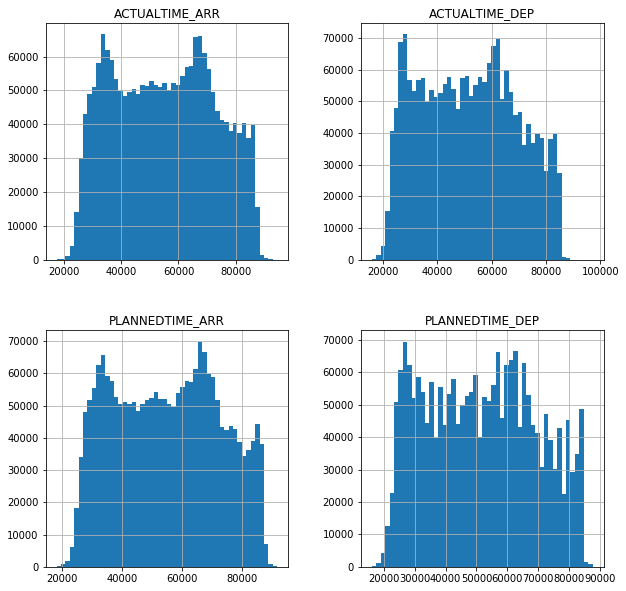

In [44]:
numeric_columns = df.select_dtypes(include=[np.number]).columns
df[numeric_columns].hist(layout=(2,2), figsize=(10,10), bins=50)
plt.savefig("TRIPS_continuous_histogram")

In [46]:
# pp = PdfPages('TRIPS_continuous_boxplot.pdf')
# plt.xlabel('Value')
# plt.ylabel('Frequency')

# for feature in df.select_dtypes(include=[np.number]).columns:
#     plt.title(feature)
#     plot = df[feature].value_counts(sort=False).plot(kind='box')
#     pp.savefig(plot.get_figure())
#     plt.show
    
# pp.close()


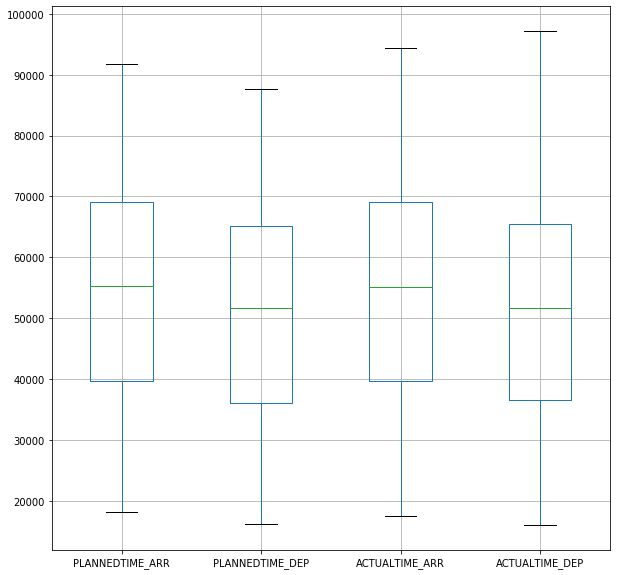

In [43]:
numeric_columns = df.select_dtypes(include=[np.number]).columns
df[numeric_columns].boxplot(figsize=(10,10))
plt.savefig("TRIPS_continuous_boxplot")

In [49]:
df.PLANNEDTIME_ARR.value_counts().values

array([467, 425, 402, ...,   1,   1,   1])

In [50]:
df.loc[df.PLANNEDTIME_ARR.value_counts().values >100]

,DAYOFSERVICE,TRIPID,LINEID,ROUTEID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP
0,2018-02-07,6253783,68,68_80,1,87245,84600,87524.0,84600.0
1,2018-02-07,6262138,25B,25B_271,2,30517,26460,32752.0,NaN
2,2018-02-07,6254942,45A,45A_70,2,35512,32100,36329.0,32082.0
3,2018-02-07,6259460,25A,25A_273,1,57261,54420,58463.0,54443.0
4,2018-02-07,6253175,14,14_15,1,85383,81600,84682.0,81608.0
5,2018-02-07,6248240,77A,77A_28,2,41648,37200,42019.0,37538.0
6,2018-02-07,6251760,39,39_21,2,34768,28920,35709.0,28929.0
7,2018-02-07,6262909,16,16_20,1,43936,38880,43721.0,38955.0
8,2018-02-07,6251147,40D,40D_102,1,33558,30600,34540.0,31185.0
9,2018-02-07,6249435,27B,27B_34,2,52682,49800,53281.0,49974.0
